In [19]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
%matplotlib inline
data1 = pd.read_excel("numeric_cleaned.xls")

In [20]:
data1.head()

,PropertyCity,Veteran,EstimatedCreditScore,BankruptcyForeClosureCheck,PropertyUse,EstimatedPropertyValue,LoanAmountRequested,AdditionalCashRequired,LenderId,APRPercentage,AmortizationType,IsFHALoan,IsJumboLoan,IsVALoan,LoanAmount,TotalFees,IsBestOffer
15019,1,1,3,3,2,550000,180001,0,9,4.656,Fixed,False,False,False,180001,2370,False
15019,1,1,3,3,2,550000,180001,0,232,4.734,Variable,False,False,False,180001,795,False
15019,1,1,3,3,2,550000,180001,0,9,5.354,Fixed,False,False,True,180001,4665,False
15019,1,1,3,3,2,550000,180001,0,7,4.077,Fixed,False,False,True,180001,5571,True
15019,1,1,3,3,2,550000,180001,0,7,4.500,Fixed,False,False,False,180001,0,False


In [21]:
data2 = data1[(data1['PropertyCity'] == 3) & (data1['Veteran'] == 0)&( data1['EstimatedCreditScore'] == 5)&( data1['BankruptcyForeClosureCheck'] == 3)&( data1['PropertyUse'] == 2)]
i = 595000
j = 470001
k = 5000
data2 = data2[(data2['EstimatedPropertyValue'].between(i-5000, i+5000, inclusive=True)) & (data2['LoanAmountRequested'].between(j-5000, j+5000, inclusive=True)) & (data2['AdditionalCashRequired'].between(k-5000, k+5000, inclusive=True))]

In [22]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

(-1.214451824867174,
 1.115053607071521,
 -1.1223266536942444,
 1.1016783299146562)

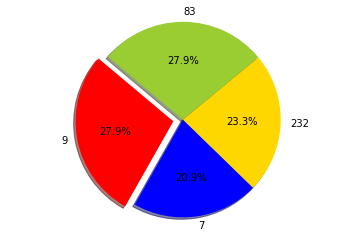

In [23]:
labels = data2['LenderId'].unique()
sizes = [ data2['LenderId'][(data2['LenderId'] == i)].count() for i in data2['LenderId'].unique()]
colors = ['red','blue','gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode[0:len(data2['LenderId'].unique())], labels=labels, colors=colors[0:len(data2['LenderId'].unique())],
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
#plt.show()

In [24]:
trace = go.Pie(labels=labels, values=sizes)
plotly.offline.iplot([trace])

In [25]:
pd.to_numeric(data2['APRPercentage'])
data2['APRPercentage'] = data2['APRPercentage'].mask(data2['APRPercentage'].between(3.5,4), 1)
data2['APRPercentage'] = data2['APRPercentage'].mask(data2['APRPercentage'].between(4,4.5), 2)
data2['APRPercentage'] = data2['APRPercentage'].mask(data2['APRPercentage'].between(4.5,5), 3)
data2['APRPercentage'] = data2['APRPercentage'].mask(data2['APRPercentage'].between(5,5.5), 4)
data2['APRPercentage'] = data2['APRPercentage'].mask(data2['APRPercentage'].between(5.5,6), 5)
data2['APRPercentage'] = data2['APRPercentage'].mask(data2['APRPercentage'].between(6,6.5), 6)
data2['APRPercentage'] = data2['APRPercentage'].mask(data2['APRPercentage'].between(6.5,7), 7)

<BarContainer object of 5 artists>

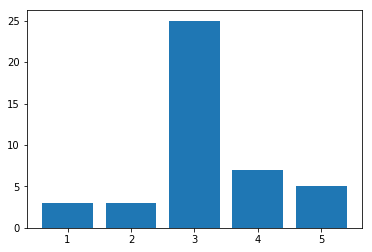

In [28]:
a = {i:data2['APRPercentage'][(data2['APRPercentage'] == i)].count() for i in data2['APRPercentage'].unique()}
a = dict(sorted(a.items()))
x1 = a.keys()
y1 = a.values()
plt.bar(x1,y1) 
#plt.show()

In [36]:
trace = go.Bar(x=list(x1), y=list(y1))
plotly.offline.iplot([trace])

(-1.0351031927336993,
 1.1725690796888393,
 -1.173736322068096,
 1.035082129132312)

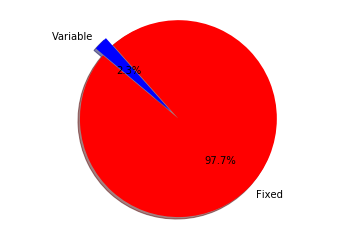

In [7]:
labels = data2['AmortizationType'].unique()
sizes = [ data2['AmortizationType'][(data2['AmortizationType'] == i)].count() for i in data2['AmortizationType'].unique()]
colors = ['red','blue','gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode[0:len(data2['AmortizationType'].unique())], labels=labels, colors=colors[0:len(data2['AmortizationType'].unique())],
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
#plt.show()

(-1.202449980023084,
 1.1153004081307625,
 -1.1785156234301348,
 1.1127188183771157)

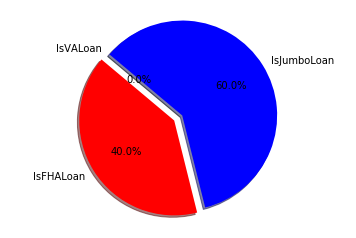

In [8]:
labels = ['IsFHALoan','IsJumboLoan','IsVALoan']
sizes = [ data2['IsFHALoan'][(data2[i] == True)].count() for i in labels]
colors = ['red','blue','yellowgreen']
explode = (0.1, 0, 0)
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
#plt.show()

(-1.1899291919652346,
 1.1091855627444267,
 -1.1074640146934565,
 1.1068277735517795)

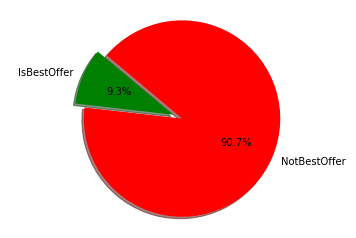

In [9]:
labels = ['IsBestOffer','NotBestOffer']
sizes = [ data2['IsBestOffer'][(data2['IsBestOffer'] == True)].count(), data2['IsBestOffer'][(data2['IsBestOffer'] == False)].count()]
colors = ['green','red']
explode = (0.1, 0)
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
#plt.show()